In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [3]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


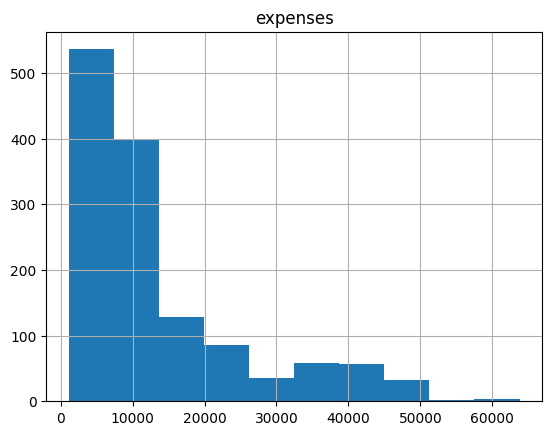

In [7]:
insurance.hist('expenses')
plt.show()

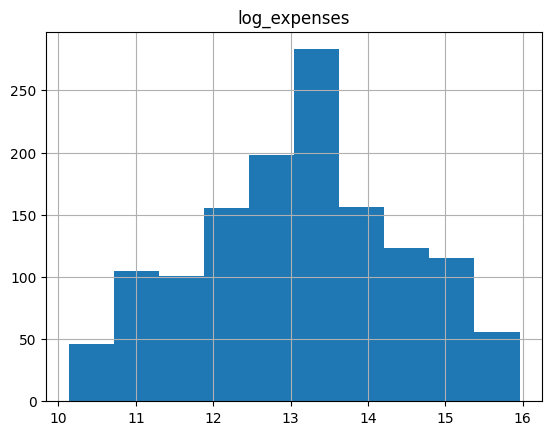

In [9]:
insurance["log_expenses"] = np.log2(insurance["expenses"])
insurance.hist("log_expenses")
plt.show()

In [10]:
insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   expenses      1338 non-null   float64
 7   log_expenses  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [13]:
correlations = insurance[['age', 'bmi', 'children', 'expenses', 'log_expenses']].corr()
correlations

,age,bmi,children,expenses,log_expenses
age,1.000000,0.109341,0.042469,0.299008,0.527834
bmi,0.109341,1.000000,0.012645,0.198576,0.132788
children,0.042469,0.012645,1.000000,0.067998,0.161336
expenses,0.299008,0.198576,0.067998,1.000000,0.892964
log_expenses,0.527834,0.132788,0.161336,0.892964,1.000000


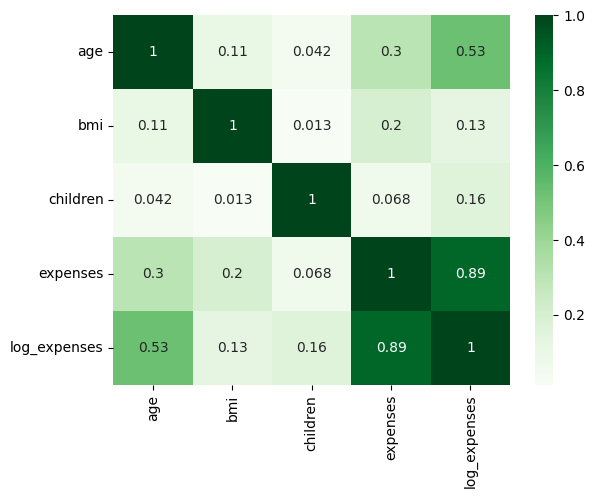

In [23]:
sns.heatmap(correlations, cmap='Greens', annot=True)
plt.show()

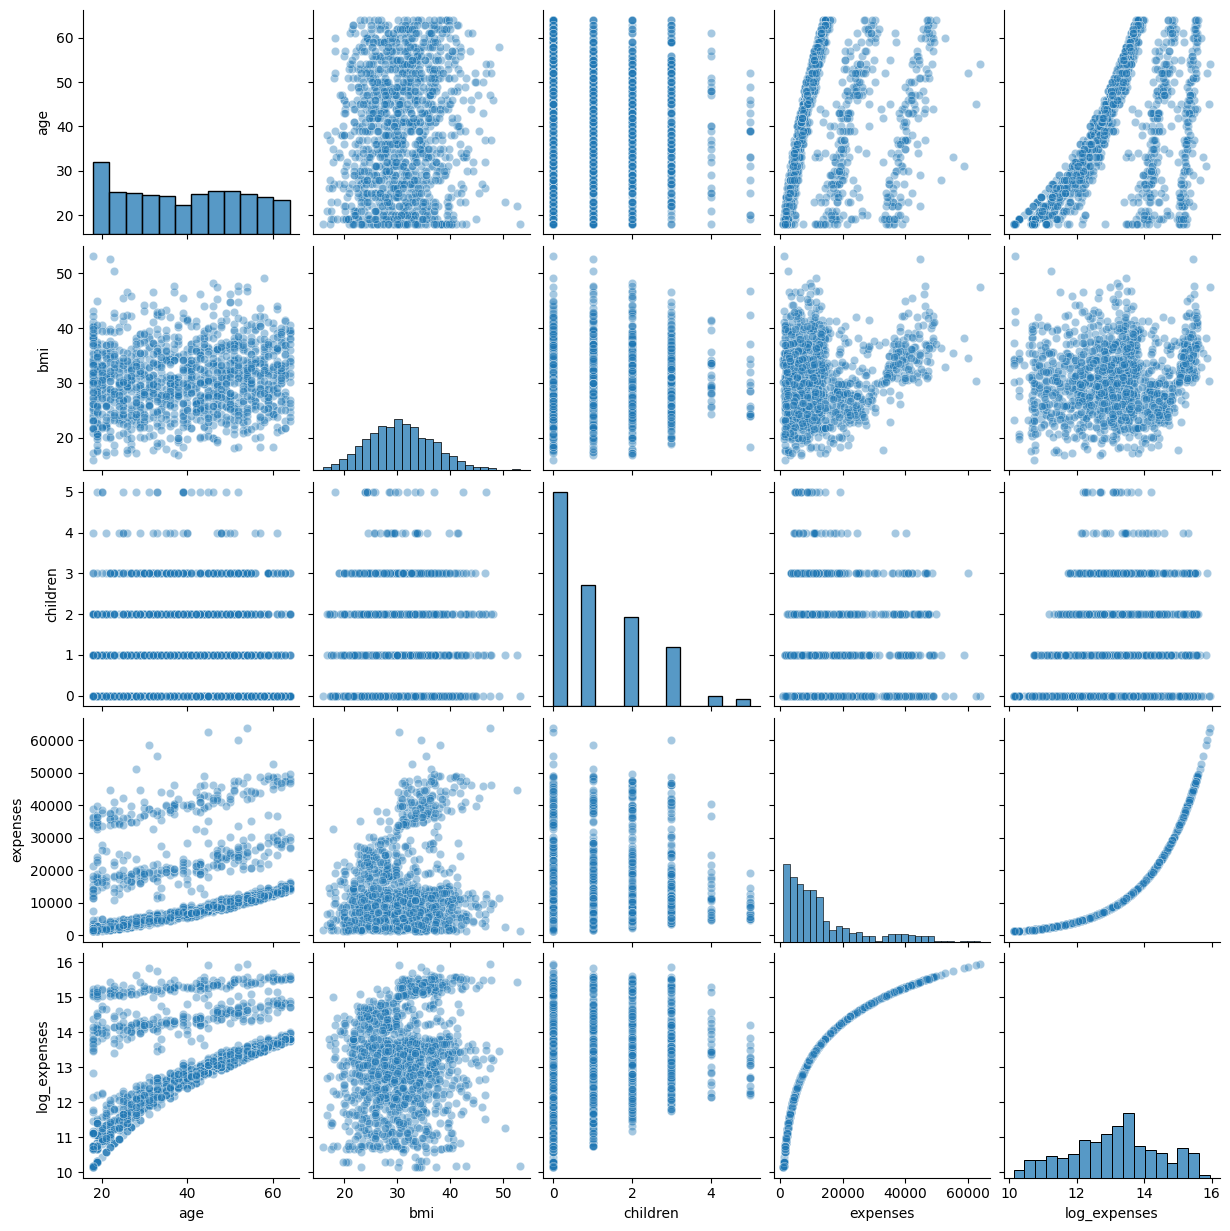

In [30]:
insurance_numeric = insurance[['age', 'bmi', 'children', 'expenses', 'log_expenses']]
sns.pairplot(insurance_numeric, kind='scatter', plot_kws={'alpha':0.4})


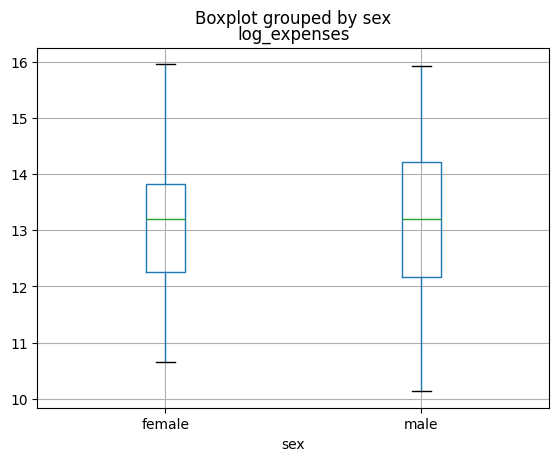

In [31]:
insurance.boxplot(column=["log_expenses"], by="sex")
plt.show()

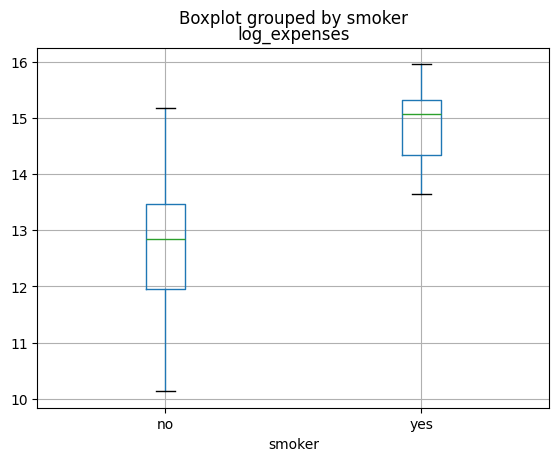

In [32]:
insurance.boxplot(column=["log_expenses"],by="smoker")
plt.show()


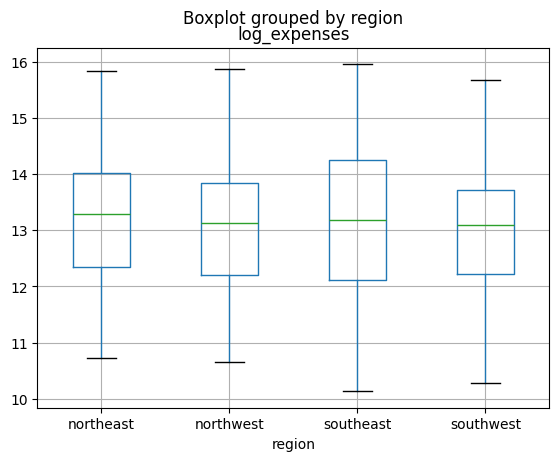

In [33]:
insurance.boxplot(column = ["log_expenses"], by="region")
plt.show()

In [40]:
#splitting data into training and test set
insurance["is_smoker"] = (insurance["smoker"]=="yes")
X = insurance[["age","bmi","is_smoker"]]
y = insurance["log_expenses"]

#75% - training set 25% - test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)



In [41]:
#Building model
insurance_model = LinearRegression()
insurance_model.fit(X_train, y_train)
insurance_model.coef_

array([0.05086267, 0.01561267, 2.23211619])

In [42]:
y_pred = insurance_model.predict(X_train)

In [44]:
train_mse = mean_squared_error(y_train, y_pred)
train_mse


0.4479462530666265

In [48]:
#MSE on original scale for the insurance expenses
train_mse_orig_scale = np.exp2(mean_squared_error(y_train,y_pred))
train_mse_orig_scale

np.float64(1.3640970151322813)

In [49]:
train_r2 = r2_score(y_train, y_pred)
train_r2

0.7433180802155016

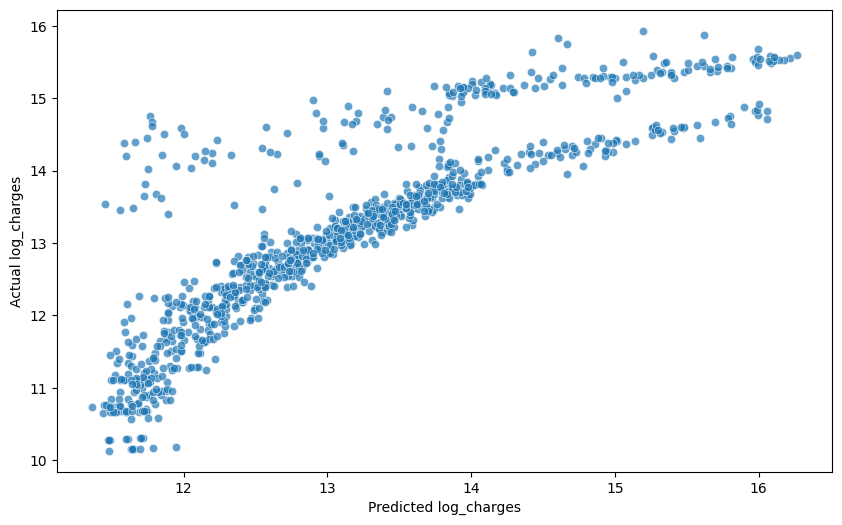

In [53]:
plot_df = pd.DataFrame({
    'predictions': y_pred,
    'actual': y_train,
    'is_smoker':X_train['is_smoker'],
    'age': X_train['age'],
    'bmi': X_train['bmi'],
    'residuals': y_train-y_pred,
})

plt.figure(figsize=(10,6))
sns.scatterplot(x='predictions', y= 'actual',
               data = plot_df, alpha = 0.7)
plt.xlabel('Predicted log_charges')
plt.ylabel('Actual log_charges')


plt.show()

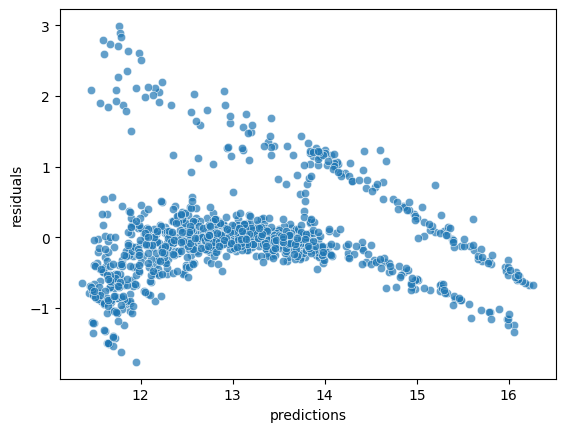

In [54]:
sns.scatterplot(x='predictions', y='residuals',
                data = plot_df, alpha = 0.7)
plt.show()

In [56]:
#Interpreting Model
cdf = pd.DataFrame(insurance_model.coef_, X.columns, columns=['Coef'])
print(cdf)

               Coef
age        0.050863
bmi        0.015613
is_smoker  2.232116


In [57]:
insurance_model.intercept_

np.float64(10.20063834299707)

In [58]:
#Final model evalutation 
test_pred = insurance_model.predict(X_test)
mean_squared_error(y_test, test_pred)


0.4529136948741526

In [59]:
np.exp2(mean_squared_error(y_test, test_pred))

np.float64(1.3688019259620319)